# AIFIT LRCN Model

#### Long Term Recurrent Convolutional Network (LRCN) is an approach which Convolution and LSTM layers are combined in a single model. 

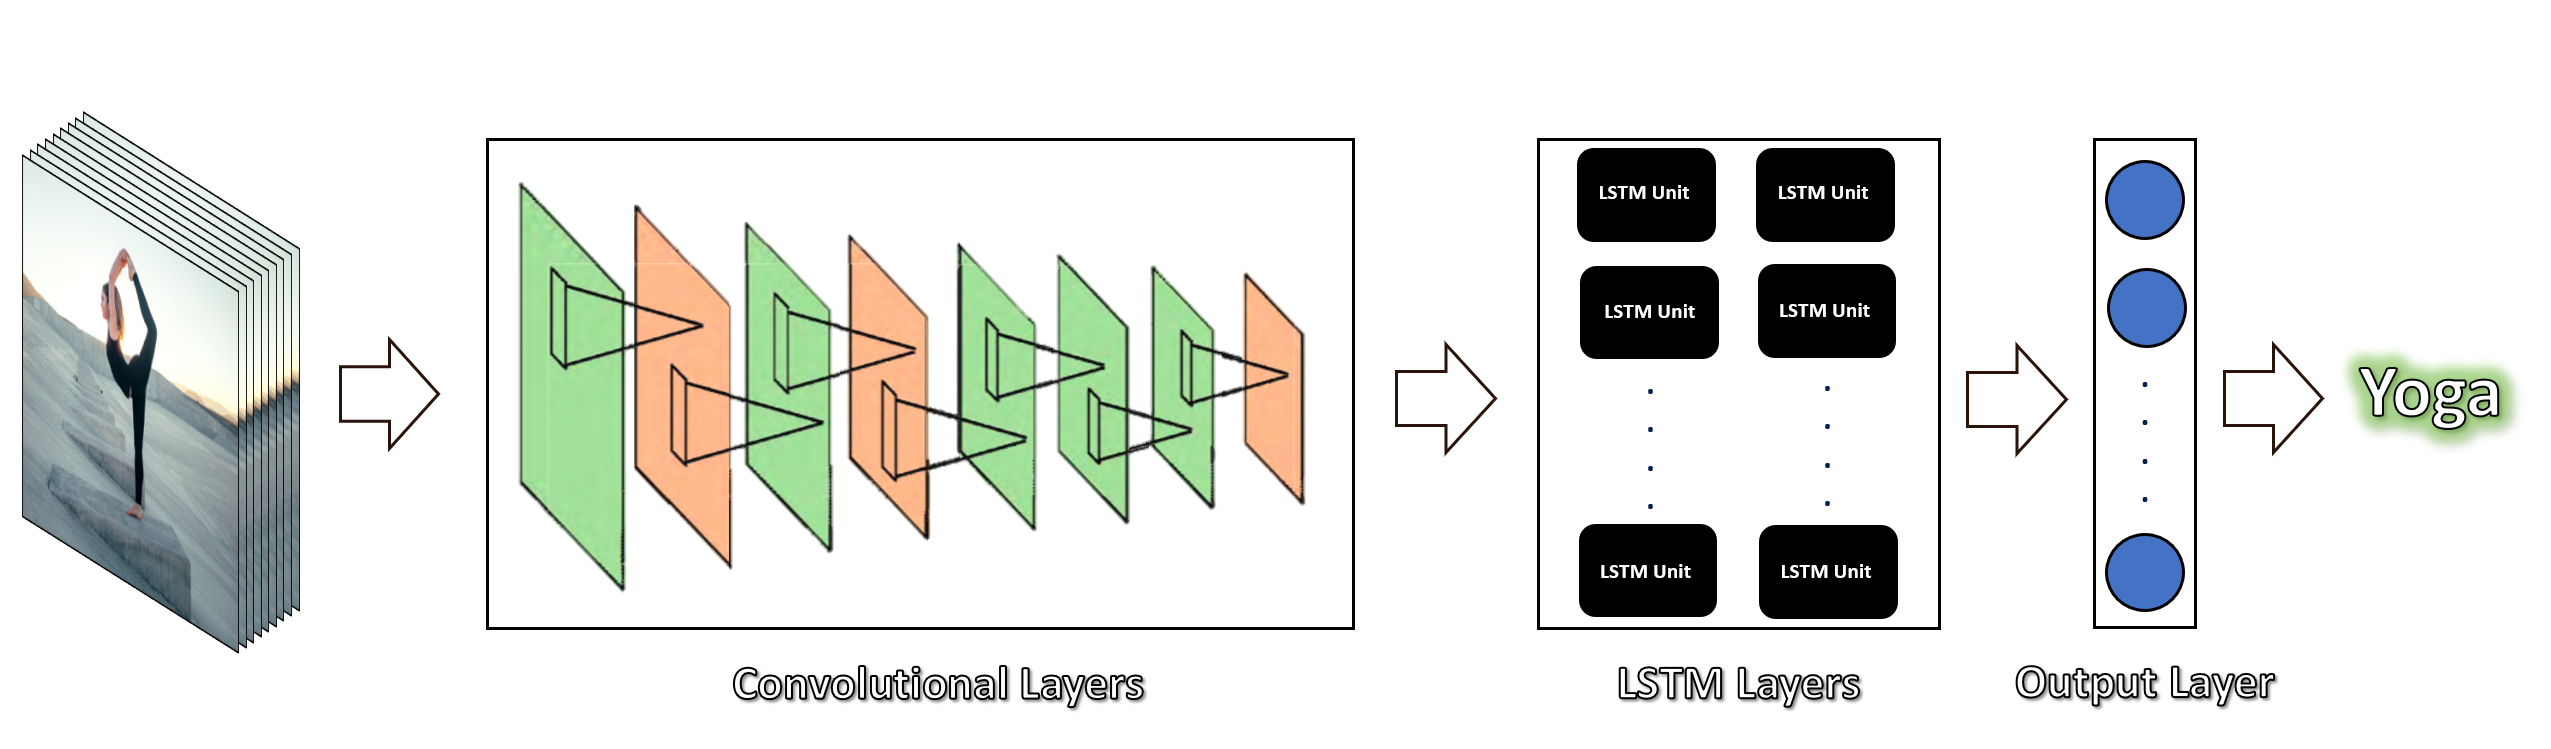

## IMPORT LIBRARIES

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt
import random
from skimage import transform
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import TimeDistributed, Dense, MaxPooling2D, Dropout, Conv2D, LSTM, Flatten, RandomFlip, RandomRotation, Resizing,Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
%matplotlib inline

In [ ]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# print('No. of GPU Available is ',len(tf.config.experimental.list_physical_devices('GPU')))
# print(tf.test.is_built_with_cuda())
# print(tf.version.VERSION)

In [2]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 25
CLASSES_LIST = ['Bicep Curl', 'Overhead Press', 'Shoulder Raise', 'Squats']

In [5]:
def create_dataset():
    features = []
    labels = []
    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Extracting Data of Class: {class_name}')
        file_path = f'AIFIT_DATASET/Processed Data/{class_name}/'
        files_list = os.listdir(file_path)
        for file_name in files_list:
            img_paths = os.listdir(f'AIFIT_DATASET/Processed Data/{class_name}/{file_name}/')
            len_frame = len(img_paths)
            if len(img_paths) == SEQUENCE_LENGTH: 
                ls = [cv2.resize(cv2.imread(file_path+file_name+'/'+i), (IMAGE_HEIGHT, IMAGE_WIDTH)) for i in img_paths]
                features.append(ls)
                labels.append(class_index)
        print('*******')
        print(np.shape(features))
                
    features = np.asarray(features, dtype='uint8')
    labels = np.asarray(labels, dtype='uint8')  
    print(features.shape)
    return features, labels

In [6]:
features, labels = create_dataset()

In [4]:
import pickle

####### write #######
# dic = {'features':features, 'labels':labels}
# with open('features.txt', 'wb') as f:
#     pickle.dump(dic, f)
    
####### load #######
with open('features.txt', 'rb') as f:
     dic = pickle.load(f)
print(dic)
features, labels = dic['features'], dic['labels']

{'features': array([[[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         ...,

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],


        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0,

In [5]:
one_hot_encoded_labels = to_categorical(labels)

In [6]:
one_hot_encoded_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [7]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25,
                                                    shuffle = True, random_state = seed_constant)

In [9]:
y_train.shape

(598, 4)

In [10]:
X_train.shape

(598, 25, 64, 64, 3)

In [11]:
X_test.shape

(200, 25, 64, 64, 3)

In [12]:
y_test.shape

(200, 4)

In [13]:
X_train = X_train/255

In [14]:
X_test = X_test/255

## Hyperparameter Tuning and Train Model

In [15]:
import keras_tuner
import keras
from keras_tuner import RandomSearch
def build_model(hp):
    model = Sequential()
    model.add(TimeDistributed(Conv2D(32, (4, 4), strides=(2, 2),padding='same',activation='relu'),
                              input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(RandomFlip(mode="horizontal_and_vertical")))
    model.add(TimeDistributed(RandomRotation(0.2))) 
    
    for i in range(hp.Int('layers', 2, 6)):
        model.add(TimeDistributed(Conv2D(
            kernel_size=(3, 3), padding='same', activation='relu',
            filters=hp.Int('filters_'+str(i), 32, 512, step=16))))
        model.add(TimeDistributed(MaxPooling2D((2, 2)))) 
        model.add(TimeDistributed(Dropout(.2)))
    
    model.add(TimeDistributed(Flatten()))
    
    model.add(LSTM(units=128,activation = 'relu', return_sequences=True, dropout=0.3))
    
    model.add(LSTM(256, return_sequences=False, dropout=0.5))
        
    
    model.add(Dense(512, activation='relu'))
    
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=['accuracy'])
    model._name = 'aifitlrcn'
    return model

In [16]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=4,
    executions_per_trial=1,
    directory='weights',
    project_name='aifit'
)

In [17]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
filters_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 16, 'sampling': 'linear'}
filters_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [18]:

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Trial 4 Complete [03h 03m 56s]
val_accuracy: 0.3400000035762787

Best val_accuracy So Far: 0.9649999737739563
Total elapsed time: 12h 37m 57s
INFO:tensorflow:Oracle triggered exit


In [59]:
best_models = tuner.get_best_models(num_models=2)

In [60]:
best_models

In [61]:
best_model = best_models[0]
best_model_1 = best_models[1]

In [62]:
tuner.results_summary()

Results summary
Results in weights\aifit
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 3
filters_0: 128
filters_1: 400
learning_rate: 0.001
filters_2: 288
filters_3: 384
Score: 0.9649999737739563
Trial summary
Hyperparameters:
layers: 4
filters_0: 240
filters_1: 368
learning_rate: 0.0001
filters_2: 32
filters_3: 32
Score: 0.9350000023841858
Trial summary
Hyperparameters:
layers: 5
filters_0: 512
filters_1: 256
learning_rate: 0.01
filters_2: 400
filters_3: 256
filters_4: 32
Score: 0.35499998927116394
Trial summary
Hyperparameters:
layers: 5
filters_0: 112
filters_1: 400
learning_rate: 0.01
filters_2: 384
filters_3: 144
filters_4: 480
Score: 0.3400000035762787


In [63]:
best_model.summary()

Model: "aifitlrcn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 25, 32, 32, 32)   1568      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 25, 32, 32, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 25, 32, 32, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 25, 32, 32, 128)  36992     
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 25, 16, 16, 128)  0 

In [137]:
best_hps = tuner.get_best_hyperparameters(2)

In [142]:
model = tuner.hypermodel.build(best_hps[0])

In [112]:
# m_his = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=32, epochs=20, verbose=1)

In [136]:
# tf.keras.utils.plot_model(best_model, to_file='model.png')

In [29]:
# from keras import regularizers
# def create_aifit_model():
#     model = Sequential()
#     model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation='relu'),
#                               input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
#     model.add(TimeDistributed(RandomFlip(mode="horizontal_and_vertical")))
#     model.add(TimeDistributed(RandomRotation(0.2)))  
    
#     model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same' ,activation = 'relu')))
#     model.add(TimeDistributed(MaxPooling2D((2, 2)))) 
#     model.add(TimeDistributed(Dropout(0.2)))

#     model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
#     model.add(TimeDistributed(Dropout(0.25)))
    
#     model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = 'relu')))
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
#     model.add(TimeDistributed(Dropout(0.25)))
    
    
#     model.add(TimeDistributed(Flatten()))
    
#     model.add(LSTM(units=128, return_sequences=True))
#     model.add(Dropout(0.5))
    
#     model.add(LSTM(units=256))
    
#     model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])
#     model._name = 'aifitlrcn'
#     return model

In [114]:
# aifit_lrcn_model = create_aifit_model()

In [113]:
# aifit_lrcn_model.summary()

In [51]:
# tf.keras.utils.plot_model(aifit_lrcn_model,to_file='model.png', show_shapes = True, show_layer_names = True)

In [115]:
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15, mode='auto', restore_best_weights=True)
# aifit_lrcn_model_history = aifit_lrcn_model.fit(x=X_train, y=y_train, epochs=100, batch_size=3,
#                                              shuffle=True, validation_split=0.2)

In [130]:

from tensorflow.keras.models import load_model
aifit_lrcn_model = load_model('best_model_V2.h5')
aifit_lrcn_model.summary()

Model: "aifitlrcn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 25, 32, 32, 32)   1568      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 25, 32, 32, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 25, 32, 32, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 25, 32, 32, 128)  36992     
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 25, 16, 16, 128)  0 

In [131]:
model_evaluation_history = aifit_lrcn_model.evaluate(X_test, y_test)

7/7 [==============================] - 4s 557ms/step - loss: 0.2385 - accuracy: 0.9650


Text(0.5, 1.0, 'Loss evolution')

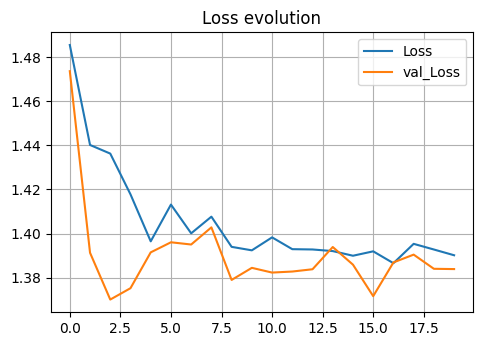

In [97]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(model_his.history['loss'], label='Loss')
plt.plot(model_his.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

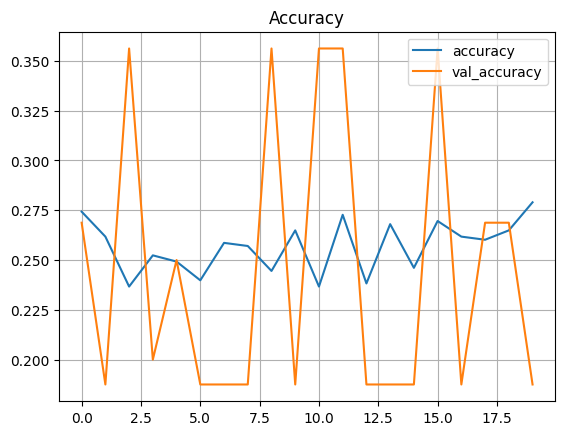

In [98]:
plt.subplot(1,1,1)
plt.plot(model_his.history['accuracy'],label='accuracy')
plt.plot(model_his.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [23]:
y_pred=aifit_lrcn_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

7/7 [==============================] - 4s 502ms/step
[2 0 2 2 1 2 0 0 2 2 1 2 3 2 2 3 3 3 1 0 2 3 1 3 0 2 0 0 0 1 2 3 1 0 3 0 2
 0 1 0 1 1 2 1 2 2 0 3 2 1 0 2 0 0 0 0 0 0 3 0 2 0 3 1 2 2 3 1 0 3 3 0 1 1
 3 3 1 3 0 1 1 1 2 0 0 0 3 0 2 2 0 0 0 3 3 0 2 1 2 0 0 0 0 0 3 0 3 3 2 1 1
 0 0 0 0 3 3 1 2 0 1 1 3 0 3 1 2 3 1 0 2 0 0 2 2 0 0 1 3 1 1 1 1 0 0 1 0 0
 1 1 1 0 0 0 0 0 1 1 2 3 1 3 0 0 0 1 3 0 2 0 0 1 0 3 1 2 0 1 3 3 1 2 1 1 0
 1 1 0 3 3 3 1 0 0 0 0 0 1 0 2]


In [24]:
from sklearn import metrics
y_test_a=np.argmax(y_test,axis=1)
print(metrics.confusion_matrix(y_test_a,y_pred))

[[68  0  0  0]
 [ 0 50  0  0]
 [ 7  0 37  0]
 [ 0  0  0 38]]


In [25]:
print(metrics.classification_report(y_test_a,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        68
           1       1.00      1.00      1.00        50
           2       1.00      0.84      0.91        44
           3       1.00      1.00      1.00        38

    accuracy                           0.96       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.97      0.96      0.96       200



7/7 [==============================] - 4s 507ms/step


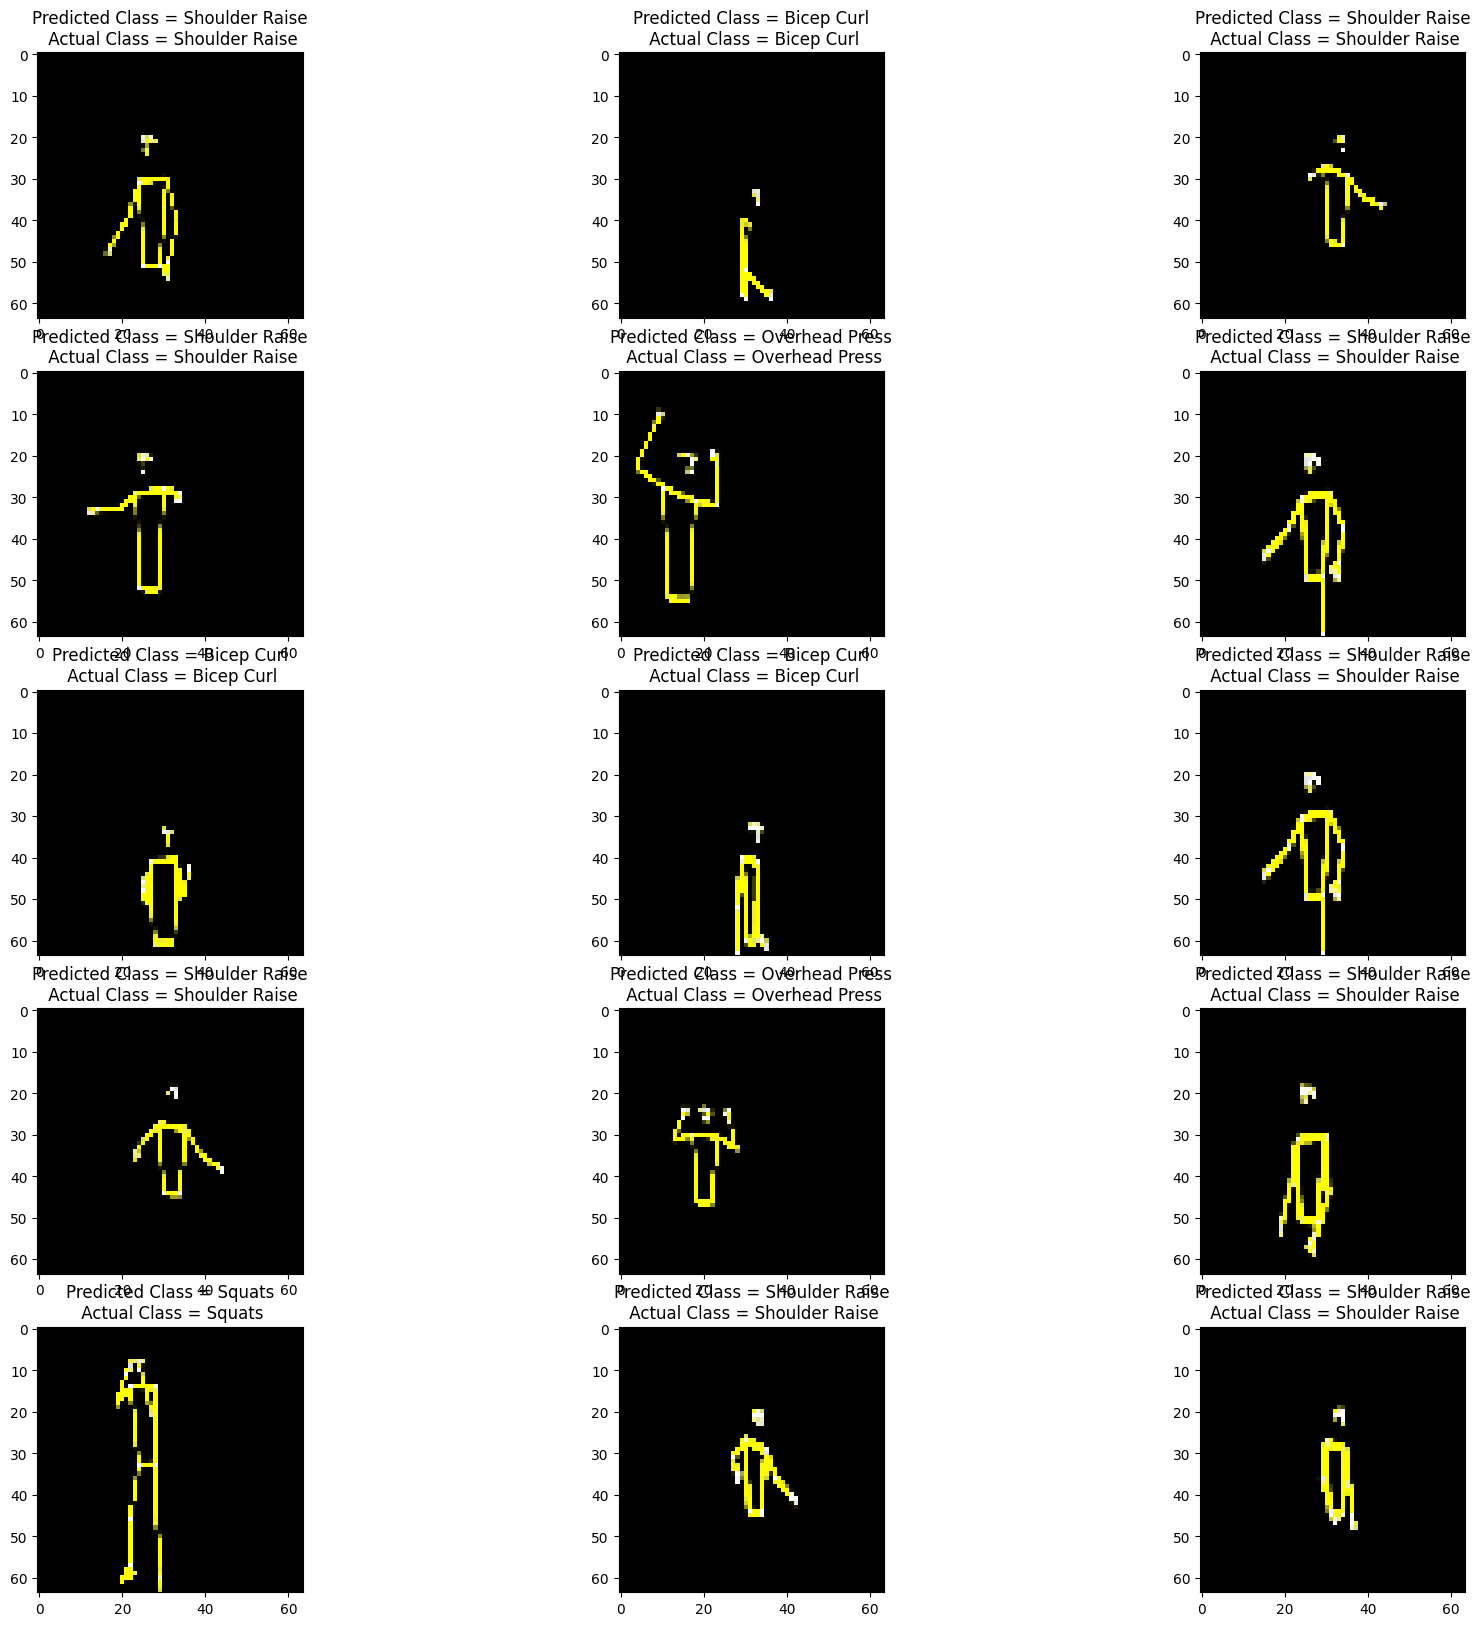

In [26]:
predicted_classes=aifit_lrcn_model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=y_test_a
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i][2])
    axes[i].set_title(f"Predicted Class = {CLASSES_LIST[predicted_classes[i]]}\n Actual Class = {CLASSES_LIST[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

In [68]:
# best_model_1.save('best_model_1_V2.h5')

In [39]:
import mediapipe as mp
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils
def detectPose(image_pose, pose, draw=False, display=False):
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    resultant = pose.process(image_in_RGB)
    marked_img = np.zeros(image_pose.shape, dtype='uint8')
    if resultant.pose_landmarks == None:
        return image_pose, marked_img
    if resultant.pose_landmarks and draw:    
        mp_drawing.draw_landmarks(image=marked_img, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=5, circle_radius=2),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,0),
                                                                               thickness=15, circle_radius=3))

    if display:
            plt.figure(figsize=[5,5])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
            plt.subplot(122);plt.imshow(marked_img[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

    else:
        return image_pose, marked_img

## Perform prediction on every frames 

In [55]:
from collections import deque 
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    predicted_class_name = ''

    while video_reader.isOpened():
        ok, frame = video_reader.read() 
        if not ok:
            break

        # Resize the Frame to fixed Dimensions.
        image_frame, marked_frame = detectPose(frame, pose_image, draw=True, display=False)
        resized_frame = cv2.resize(marked_frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        print(np.shape(frames_queue))
        frames_queue.append(resized_frame/255)
        if len(frames_queue) == SEQUENCE_LENGTH:
            predicted_labels_probabilities = aifit_lrcn_model.predict(np.expand_dims(frames_queue, axis = 0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]
#             if predicted_class_name != 'shoulder raise':
#                 predicted_class_name = 'shoulder rais'
#                 confi = random.randint(20, 40)

        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        video_writer.write(frame)
    
    video_reader.release()
    video_writer.release()

In [54]:
from collections import deque 
import random
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    predicted_class_name = 'Detecting'
    confi = 'NA'
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
    seq_list = []
    while video_reader.isOpened():
        ok, frame = video_reader.read() 
        if not ok:
            break
        if len(seq_list) != SEQUENCE_LENGTH:
            image_frame, marked_frame = detectPose(frame, pose_image, draw=True, display=False)
            resized_frame = cv2.resize(marked_frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
            seq_list.append(resized_frame/255)
        else:
#             seq_list = []
#         # Resize the Frame to fixed Dimensions.
            
#             frames_queue.append(resized_frame)
            if len(seq_list) == SEQUENCE_LENGTH:
                predicted_labels_probabilities = aifit_lrcn_model.predict([seq_list])
                predicted_label = np.argmax(predicted_labels_probabilities, axis=1)
                predicted_class_name = CLASSES_LIST[predicted_label]
                confi = round(predicted_labels_probabilities[predicted_label]*100, 2)
               
            seq_list = []

        cv2.putText(frame, f'{predicted_class_name}-{confi}', 
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        video_writer.write(frame)
    
    video_reader.release()
    video_writer.release()

In [56]:
opath = 'D:/bHAVESH/Results/a.mp4'
ipath = 'D:/bHAVESH/4.mp4'
predict_on_video(ipath, opath, 25)

(0,)
(1, 64, 64, 3)
(2, 64, 64, 3)
(3, 64, 64, 3)
(4, 64, 64, 3)
(5, 64, 64, 3)
(6, 64, 64, 3)
(7, 64, 64, 3)
(8, 64, 64, 3)
(9, 64, 64, 3)
(10, 64, 64, 3)
(11, 64, 64, 3)
(12, 64, 64, 3)
(13, 64, 64, 3)
(14, 64, 64, 3)
(15, 64, 64, 3)
(16, 64, 64, 3)
(17, 64, 64, 3)
(18, 64, 64, 3)
(19, 64, 64, 3)
(20, 64, 64, 3)
(21, 64, 64, 3)
(22, 64, 64, 3)
(23, 64, 64, 3)
(24, 64, 64, 3)
1/1 [==============================] - 0s 44ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 34ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 35ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 37ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 36ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 35ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [===

1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 37ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 34ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/s

1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 34ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 36ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 34ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 33ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 35ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 34ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 35ms/step
(25, 64, 64, 3)
1/1 [==============================] - 0s 34ms/s

In [43]:
from moviepy.editor import *
# Display the output video.
VideoFileClip(opath, audio=False, target_resolution=(300,None)).ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Perfrom Single Prediction

In [30]:
def predict_single_action(video_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_list = []
    predicted_class_name = ''
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
    print(video_frames_count)
    print(skip_frames_window)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read() 
        if not success:
            break
        image_frame, marked_frame = detectPose(frame, pose_image, draw=True, display=False)
        resized_frame = cv2.resize(marked_frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        frames_list.append(resized_frame)

    predicted_labels_probabilities = aifit_lrcn_model.predict(np.expand_dims(frames_list, axis = 0))[0]
    predicted_label = np.argmax(predicted_labels_probabilities)
    predicted_class_name = CLASSES_LIST[predicted_label]
    print(predicted_labels_probabilities)
    predicted_confidence = []
#     for i in predicted_labels_probabilities:
#         if i*100 > 30:
#             predicted_confidence.append(i)
    
#     if predicted_class_name == CLASSES_LIST[6]:
#         predicted_class_name = 'Inaccurate Workout'
#         predicted_labels_probabilities[predicted_label] = 0.0555
    print(f'Action Predicted: {predicted_class_name}\nConfidence: {round(predicted_labels_probabilities[predicted_label]*100, 2)} %')
        
    # Release the VideoCapture object. 
    video_reader.release()

In [50]:
ipath = 'D:/bHAVESH/4.mp4'
# ipath = 'C:/Users/bhave/OneDrive/Pictures/Camera Roll/WIN_20230123_13_23_24_Pro.mp4'
# "C:\Users\bhave\OneDrive\Pictures\Camera Roll\.mp4"
# ipath = "E:/Final Year/Major/AiFit/AiFit Web App/static/images/recorded_videos/bhavesh_dhake.mp4"
predict_single_action(ipath, 25)

471
18
1/1 [==============================] - 0s 32ms/step
[3.4607126e-04 9.5213354e-06 9.9963963e-01 4.8079255e-06]
Action Predicted: Shoulder Raise
Confidence: 99.96 %
